In [361]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\sentiment project\amazon_reviews_all.csv")

In [362]:
data

,Reviewer Name,Stars,Review Title,Review,Review Date,Verified Purchase,Helpful Votes
0,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
1,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
2,Unknown,4.5 out of 5 stars,Unknown,Unknown,Unknown,No,0
3,Unknown,4.5 out of 5 stars,Unknown,Unknown,Unknown,No,0
4,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
...,...,...,...,...,...,...,...
489,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
490,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
491,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
492,Unknown,Previous set of slides,Unknown,Unknown,Unknown,No,0


In [363]:
# now by looking at the data what i can say :
# we need only stars and revive column other all columns are not important:
# droping those columns:
data.drop(["Stars","Reviewer Name","Review Title","Review Date","Verified Purchase","Helpful Votes"],axis=1,inplace=True)

In [364]:
data.describe()

,Review
count,489
unique,124
top,Unknown
freq,274


In [365]:
# let drop the records having unknown revievs....(becuase we dont need those recods)
data=data[data["Review"]!="Unknown"]

In [366]:
data

,Review
9,So lightweight. battery life is good .better s...
10,So lightweight. battery life is good .better s...
11,DesignOne of the most noticeable changes to th...
12,Good and improved device with latest features ...
13,Good phoneBut camera is not good.
...,...
484,Good product and amazon delivered product on time
485,Loved the camera
486,"I have bought phone just 6 month before, iPhon..."
487,As expected delivered the product safely and n...


In [367]:
# now checking for "unknown" in whole dataframe:
data[(data == "Unknown").any(axis=1)]
# there is no "unknown"

,Review


In [368]:
data.describe()

,Review
count,215
unique,123
top,Nice phone
freq,9


In [369]:
data.isna().sum()

Review    5
dtype: int64

In [370]:
data[data.isna().any(axis=1)]


,Review
113,NaN
309,NaN
328,NaN
329,NaN
407,NaN


In [371]:
data.dropna(inplace=True)

C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15932\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [372]:
data.isna().sum()

Review    0
dtype: int64

In [373]:
data.reset_index(drop=True,inplace=True)

In [374]:
data.describe()

,Review
count,215
unique,123
top,Nice phone
freq,9


In [375]:
data

,Review
0,So lightweight. battery life is good .better s...
1,So lightweight. battery life is good .better s...
2,DesignOne of the most noticeable changes to th...
3,Good and improved device with latest features ...
4,Good phoneBut camera is not good.
...,...
210,Good product and amazon delivered product on time
211,Loved the camera
212,"I have bought phone just 6 month before, iPhon..."
213,As expected delivered the product safely and n...


In [376]:
data

,Review
0,So lightweight. battery life is good .better s...
1,So lightweight. battery life is good .better s...
2,DesignOne of the most noticeable changes to th...
3,Good and improved device with latest features ...
4,Good phoneBut camera is not good.
...,...
210,Good product and amazon delivered product on time
211,Loved the camera
212,"I have bought phone just 6 month before, iPhon..."
213,As expected delivered the product safely and n...


In [377]:
data.dtypes

Review    object
dtype: object

In [378]:
# Converting  Stars into sentiment labels:
# Positive (3): 4 and 5 stars
# Neutral (2): 3 stars
# Negative (1): 1 and 2 stars
# Mapping stars to sentiment labels defining function:
def star_sentiment(star):
    if star >= 4:
        return 2  # Positive
    elif star == 3:
        return 1  # Neutral
    else:
        return 0  # Negative

In [379]:
data

,Review
0,So lightweight. battery life is good .better s...
1,So lightweight. battery life is good .better s...
2,DesignOne of the most noticeable changes to th...
3,Good and improved device with latest features ...
4,Good phoneBut camera is not good.
...,...
210,Good product and amazon delivered product on time
211,Loved the camera
212,"I have bought phone just 6 month before, iPhon..."
213,As expected delivered the product safely and n...


In [380]:

# Text Cleaning Function
import string
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [381]:
# Apply text cleaning
import re
data["Cleaned_Review"] = data["Review"].astype(str).apply(clean_text)

C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15932\3122680478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cleaned_Review"] = data["Review"].astype(str).apply(clean_text)


In [382]:
data

,Review,Cleaned_Review
0,So lightweight. battery life is good .better s...,so lightweight battery life is good better sou...
1,So lightweight. battery life is good .better s...,so lightweight battery life is good better sou...
2,DesignOne of the most noticeable changes to th...,designone of the most noticeable changes to th...
3,Good and improved device with latest features ...,good and improved device with latest features ...
4,Good phoneBut camera is not good.,good phonebut camera is not good
...,...,...
210,Good product and amazon delivered product on time,good product and amazon delivered product on time
211,Loved the camera,loved the camera
212,"I have bought phone just 6 month before, iPhon...",i have bought phone just month before iphone c...
213,As expected delivered the product safely and n...,as expected delivered the product safely and n...


In [383]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Defining Function
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function
data['sentiment'] = data['Cleaned_Review'].apply(get_sentiment)


data


[nltk_data] Downloading package vader_lexicon to C:\Users\Nagesh
[nltk_data]     Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15932\3195419812.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['Cleaned_Review'].apply(get_sentiment)


,Review,Cleaned_Review,sentiment
0,So lightweight. battery life is good .better s...,so lightweight battery life is good better sou...,Positive
1,So lightweight. battery life is good .better s...,so lightweight battery life is good better sou...,Positive
2,DesignOne of the most noticeable changes to th...,designone of the most noticeable changes to th...,Positive
3,Good and improved device with latest features ...,good and improved device with latest features ...,Positive
4,Good phoneBut camera is not good.,good phonebut camera is not good,Positive
...,...,...,...
210,Good product and amazon delivered product on time,good product and amazon delivered product on time,Positive
211,Loved the camera,loved the camera,Positive
212,"I have bought phone just 6 month before, iPhon...",i have bought phone just month before iphone c...,Neutral
213,As expected delivered the product safely and n...,as expected delivered the product safely and n...,Positive


In [384]:
data["sentiment"].value_counts()

sentiment
Positive    161
Negative     28
Neutral      26
Name: count, dtype: int64

In [385]:
! pip install wordcloud

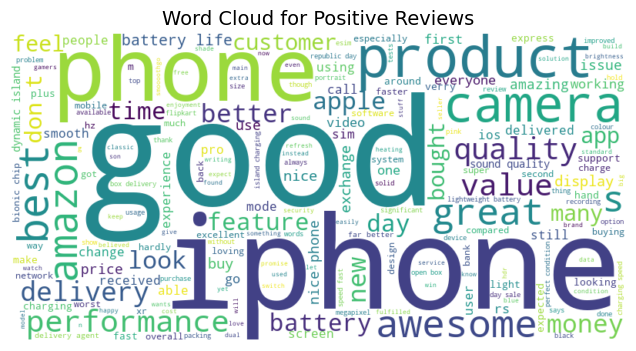

In [386]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


text = " ".join(data[data['sentiment'] == "Positive"]['Cleaned_Review'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Positive Reviews", fontsize=14)
plt.show()




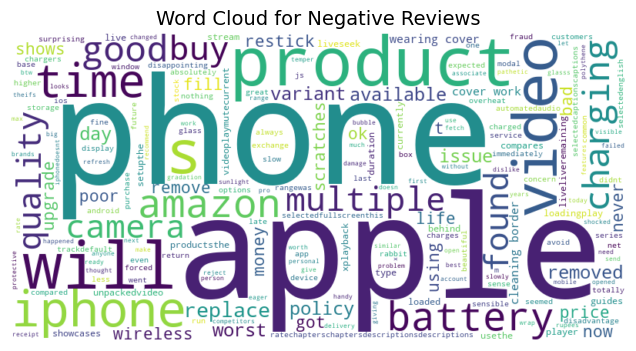

In [387]:
text = " ".join(data[data['sentiment'] == "Negative"]['Cleaned_Review'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Negative Reviews", fontsize=14)
plt.show()


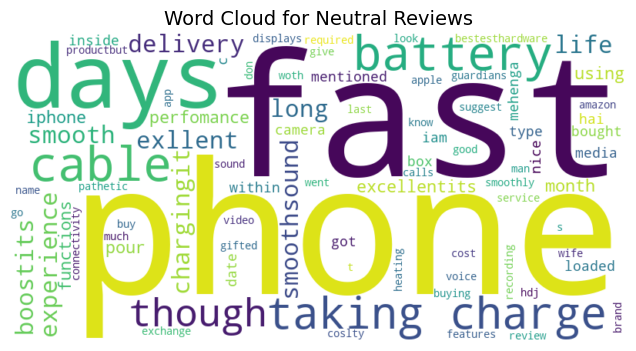

In [388]:
text = " ".join(data[data['sentiment'] == "Neutral"]['Cleaned_Review'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Neutral Reviews", fontsize=14)
plt.show()


In [389]:
data

,Review,Cleaned_Review,sentiment
0,So lightweight. battery life is good .better s...,so lightweight battery life is good better sou...,Positive
1,So lightweight. battery life is good .better s...,so lightweight battery life is good better sou...,Positive
2,DesignOne of the most noticeable changes to th...,designone of the most noticeable changes to th...,Positive
3,Good and improved device with latest features ...,good and improved device with latest features ...,Positive
4,Good phoneBut camera is not good.,good phonebut camera is not good,Positive
...,...,...,...
210,Good product and amazon delivered product on time,good product and amazon delivered product on time,Positive
211,Loved the camera,loved the camera,Positive
212,"I have bought phone just 6 month before, iPhon...",i have bought phone just month before iphone c...,Neutral
213,As expected delivered the product safely and n...,as expected delivered the product safely and n...,Positive


In [390]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["sentiment"]=le.fit_transform(data["sentiment"])




C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15932\911312912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"]=le.fit_transform(data["sentiment"])


In [391]:

# Feature Engineering: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data["Cleaned_Review"])
y = data["sentiment"]

In [392]:
# Save the TF-IDF vectorizer to a .pkl file
import pickle
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("TF-IDF vectorizer saved as tfidf_vectorizer.pkl")

TF-IDF vectorizer saved as tfidf_vectorizer.pkl


In [393]:
# Split data into train & test sets(20%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [394]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [395]:
# Model Evaluation
from sklearn.metrics import accuracy_score,classification_report
y_pred = LR.predict(X_test)
logistic_regression=f"logistic_regression:", accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.20      0.33         5
           2       0.78      1.00      0.88        32

    accuracy                           0.79        43
   macro avg       0.93      0.46      0.50        43
weighted avg       0.84      0.79      0.73        43



In [396]:
#Train Decision Tree DTC
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)


DecisionTreeClassifier()

In [397]:
# Predict
y_pred = DTC.predict(X_test)

In [398]:
# Evaluate
Decision_Tree_Accuracy=f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}"
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9535
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.71      1.00      0.83         5
           2       1.00      0.97      0.98        32

    accuracy                           0.95        43
   macro avg       0.90      0.93      0.91        43
weighted avg       0.97      0.95      0.96        43



In [399]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [400]:

# Predict
y_pred = RFC.predict(X_test)

# Evaluate
Random_Forest_Accuracy=f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}"
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9302
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.83      1.00      0.91         5
           2       0.94      1.00      0.97        32

    accuracy                           0.93        43
   macro avg       0.92      0.83      0.85        43
weighted avg       0.94      0.93      0.92        43



In [401]:
import pickle
file='sentiment_deploy'
pickle.dump(RFC,open(file,'wb'))


In [402]:
from sklearn.svm import SVC

# Train SVM SVM
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)


SVC(kernel='linear')

In [403]:
# Predict
y_pred = SVM.predict(X_test)

# Evaluate
SVM_Accuracy=f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}"
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.8837
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      0.80      0.89         5
           2       0.86      1.00      0.93        32

    accuracy                           0.88        43
   macro avg       0.95      0.71      0.77        43
weighted avg       0.90      0.88      0.86        43



In [404]:
# Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
ANN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output Layer (3 Sentiment Categories)
])
# Compile Model
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
ANN.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))



c:\Users\Nagesh Agrawal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.5877 - loss: 1.0686 - val_accuracy: 0.7442 - val_loss: 0.9512
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7126 - loss: 0.9226 - val_accuracy: 0.7442 - val_loss: 0.7734
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8068 - loss: 0.6833 - val_accuracy: 0.7442 - val_loss: 0.6175
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7431 - loss: 0.5835 - val_accuracy: 0.7442 - val_loss: 0.5370
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7179 - loss: 0.5338 - val_accuracy: 0.7674 - val_loss: 0.4622
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8077 - loss: 0.3671 - val_accuracy: 0.7907 - val_loss: 0.4000
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9015 - loss: 0.2971 - val_accuracy: 0.8372 - val_loss: 0.3374
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9221 - loss: 0.2606 - val_accuracy: 0.8837 - 

In [405]:
# Evaluate Model
loss, accuracy = ANN.evaluate(X_test, y_test)
ANN_Model_Accuracy=f"ANN Model Accuracy: {accuracy:.4f}"
print(f"ANN Model Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0714 
ANN Model Accuracy: 1.0000


In [406]:
print(logistic_regression)
print(Decision_Tree_Accuracy)
print(Random_Forest_Accuracy)
print(SVM_Accuracy)
print(ANN_Model_Accuracy)

('logistic_regression:', 0.7906976744186046)
Decision Tree Accuracy: 0.9535
Random Forest Accuracy: 0.9302
SVM Accuracy: 0.8837
ANN Model Accuracy: 1.0000
